# Data Aggregation

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt

/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


The dataset contains details on **crimes against children** under various crime categories such as 
    - Murder
    - Rape
    - Kidnapping and Abduction
    - Foeticide, Abetment of suicide
    - Exposure and abandonment
    - Procuration of minor girls
    - Buying of girls for  prostitution
    - Selling of girls for prostitution
    - Prohibition of child marriage act
    - Other Crimes.

It contains district-wise information of all the states in India between the years **(2001 - 2015)** in number.


In [2]:
## Loads CSV File in memory
path = './dataset/DM_Dataset-T12.csv'
csv_reader = csv.reader(open(path, 'r'))

all_records = [] ## List(List(str)) containing all the records
header = [] ## List of columns of the dataframe

In [3]:
## Here is what our dataset looks like
pd.read_csv(path).drop(['Infanticide'], axis=1)

,STATE,DISTRICT,Year,Murder,Rape,Foeticide,Kidnapping and Abduction,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Literacy Rate- Total,Literacy Rate - Rural,Literacy Rate - Urban
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,0.0,29.0,6.0,0.0,0.0,0.0,0.0,0.0,66,NaN,NaN,NaN
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11522,Lakshadweep,Lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,NaN,NaN,NaN
11523,Lakshadweep,Total District(s),2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,NaN,NaN,NaN
11524,Puducherry,Karaikal,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,NaN,NaN,NaN
11525,Puducherry,Puducherry,2015,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,52,NaN,NaN,NaN


The dataset contains rows having which has total crimes which need to be removed from the dataframe. The following code removes such rows. 

In [4]:
for idx,record in enumerate(csv_reader):
    if idx == 0:
        header = [data.lower() for data in record]
    elif 'total' not in record[1].lower():
        all_records.append([data.lower() for data in record])

df = pd.DataFrame(all_records, columns=header)

## TypeCast all the values to numeric type
for column in header[3:]:
    df[column] = df[column].apply(pd.to_numeric, errors='coerce')

## Drops features (Feature Selection)
df.drop(['infanticide', 'literacy rate- total',
         'literacy rate - rural', 'literacy rate - urban'], 
        axis=1, inplace=True)

Upon finding unique names of 'state' field in the dataset, we found that there are multiple variation of same name. The following snippet removes such ambiguity.

In [5]:
## Returns unique field name in the column 'state'
df.state.unique()

array(['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
       'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
       'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala',
       'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim',
       'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand',
       'west bengal', 'a & n islands', 'chandigarh', 'd & n haveli',
       'daman & diu', 'delhi', 'lakshadweep', 'puducherry', 'a&n islands',
       'd&n haveli', 'delhi ut', 'telangana'], dtype=object)

In [6]:
## Removes name ambiguity
for i in range (len(df)):
    if df.loc[i, ('state')] == 'a & n islands': df.loc[i, ('state')] = 'a&n islands'
    if df.loc[i, ('state')] == 'd & n haveli': df.loc[i, ('state')] = 'd&n haveli'
    if df.loc[i, ('state')] == 'delhi ut': df.loc[i, ('state')] = 'delhi'
len(df.state.unique())

36

### Data Aggregation

The next code snippet clubs all the districts into state

In [7]:
state_clubbed = []
state_index = 0
state = 0

while state_index < len(df):
    state = df['state'].loc[state_index]
    year = df['year'].loc[state_index]
    dist_index = state_index
    while dist_index < len(df) and df['state'].loc[dist_index] == state:
        dist_index += 1
    temp = df.iloc[state_index : dist_index].drop(['state', 'district', 'year'], axis=1).sum().to_list()
    temp.insert(0,state)
    temp.insert(1,int(year))
    state_clubbed.append(temp)
    
    state_index = dist_index
        

In [8]:
## Assigns column names
state_df = pd.DataFrame(state_clubbed, columns=['state', 'year', 'murder', 'rape', 'foeticide', 'kidnapping and abduction',
                                              'abetment of suicide', 'exposure and abandonment', 'procuration of minor girls',
                                              'selling girls for prostitution', 'prohibition of child marriage act',
                                              'other crimes', 'total'])

### Dataset Summary

In [9]:
state_df.describe()

,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,2008.024668,42.254269,177.779886,3.155598,369.007590,1.669829,23.332068,19.753321,2.015180,3.633776,185.626186,925.449715
std,4.334993,81.631486,319.954103,7.468978,942.870157,5.929008,53.598261,91.286454,10.981654,8.225010,480.270756,1900.819054
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,1.000000,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,33.500000
50%,2008.000000,8.000000,39.000000,0.000000,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,161.000000
75%,2012.000000,51.000000,182.500000,2.000000,284.000000,1.000000,13.500000,8.000000,0.000000,4.000000,115.500000,1010.500000
max,2015.000000,543.000000,2352.000000,79.000000,6960.000000,95.000000,321.000000,1303.000000,115.000000,77.000000,3502.000000,15085.000000


# Data Visualisation

### Total Crimes Yearwise (2001-2015)

The first plot shows the trend of total crimes over the years.

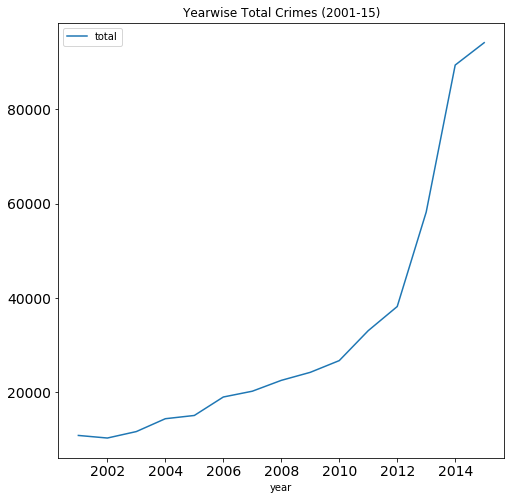

In [10]:
total_crime_yearwise = state_df.loc[:,('year', 'total')]

total_crime_yearwise.groupby('year').sum().plot(y='total', kind='line', fontsize=14, 
                                                 title="Yearwise Total Crimes (2001-15)", figsize=(8,8))

### Crime Wise Trends - 2001-15

In [11]:
headers = ['murder', 'rape', 'foeticide', 'kidnapping and abduction',
            'abetment of suicide', 'exposure and abandonment', 'procuration of minor girls',
            'selling girls for prostitution', 'prohibition of child marriage act',]

In [12]:
sum_crimewise = state_df.drop(["state", "total", "other crimes"],
                              axis=1, inplace=False).groupby('year').sum()
sum_crimewise

,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act
year,,,,,,,,,
2001,1149.0,2120.0,55.0,2849.0,26.0,686.0,139.0,10.0,83.0
2002,1175.0,2376.0,84.0,2282.0,24.0,644.0,124.0,5.0,113.0
2003,1315.0,2949.0,57.0,2571.0,25.0,722.0,171.0,36.0,63.0
2004,1405.0,3520.0,86.0,3167.0,33.0,715.0,205.0,19.0,93.0
2005,1351.0,4063.0,86.0,3531.0,43.0,933.0,145.0,50.0,122.0
2006,1450.0,4721.0,125.0,5102.0,45.0,909.0,231.0,123.0,99.0
2007,1503.0,5008.0,96.0,6236.0,26.0,922.0,253.0,69.0,96.0
2008,1436.0,5446.0,73.0,7650.0,29.0,864.0,224.0,49.0,104.0
2009,1551.0,5368.0,123.0,8945.0,46.0,857.0,237.0,57.0,5.0


#### The following code snippet gives us an idea of the total increase/decrease of different types of crimes in India from 2001 to 2015

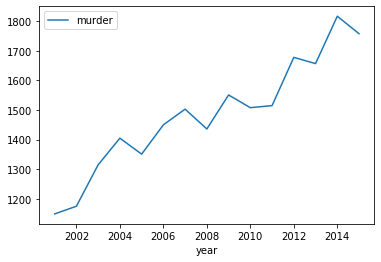

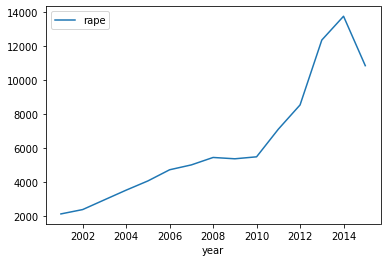

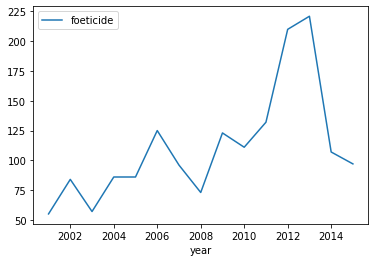

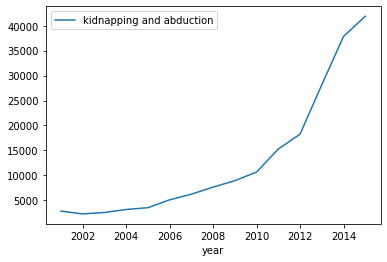

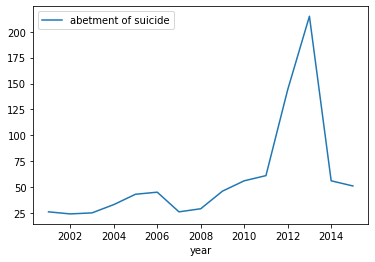

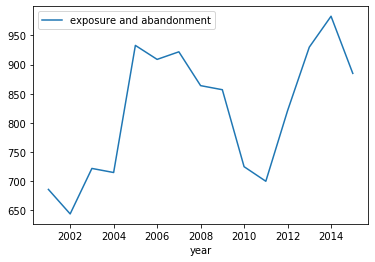

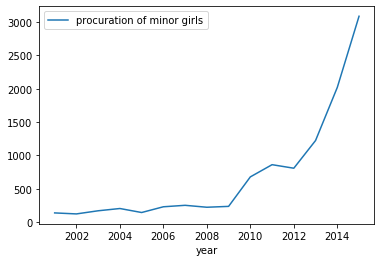

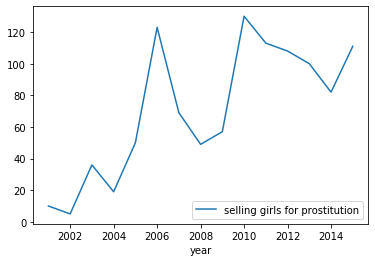

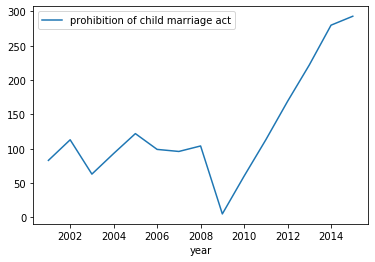

In [13]:
for crime in headers:
    crime_df = state_df.loc[:, ('state', 'year', crime)].groupby('year').sum()
    crime_df.plot()

### Statewise Contribution (2001-15) 

In [14]:
total_crimes_statewise = state_df.loc[:, ('state','total')].groupby('state').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb78107de90>],
      dtype=object)

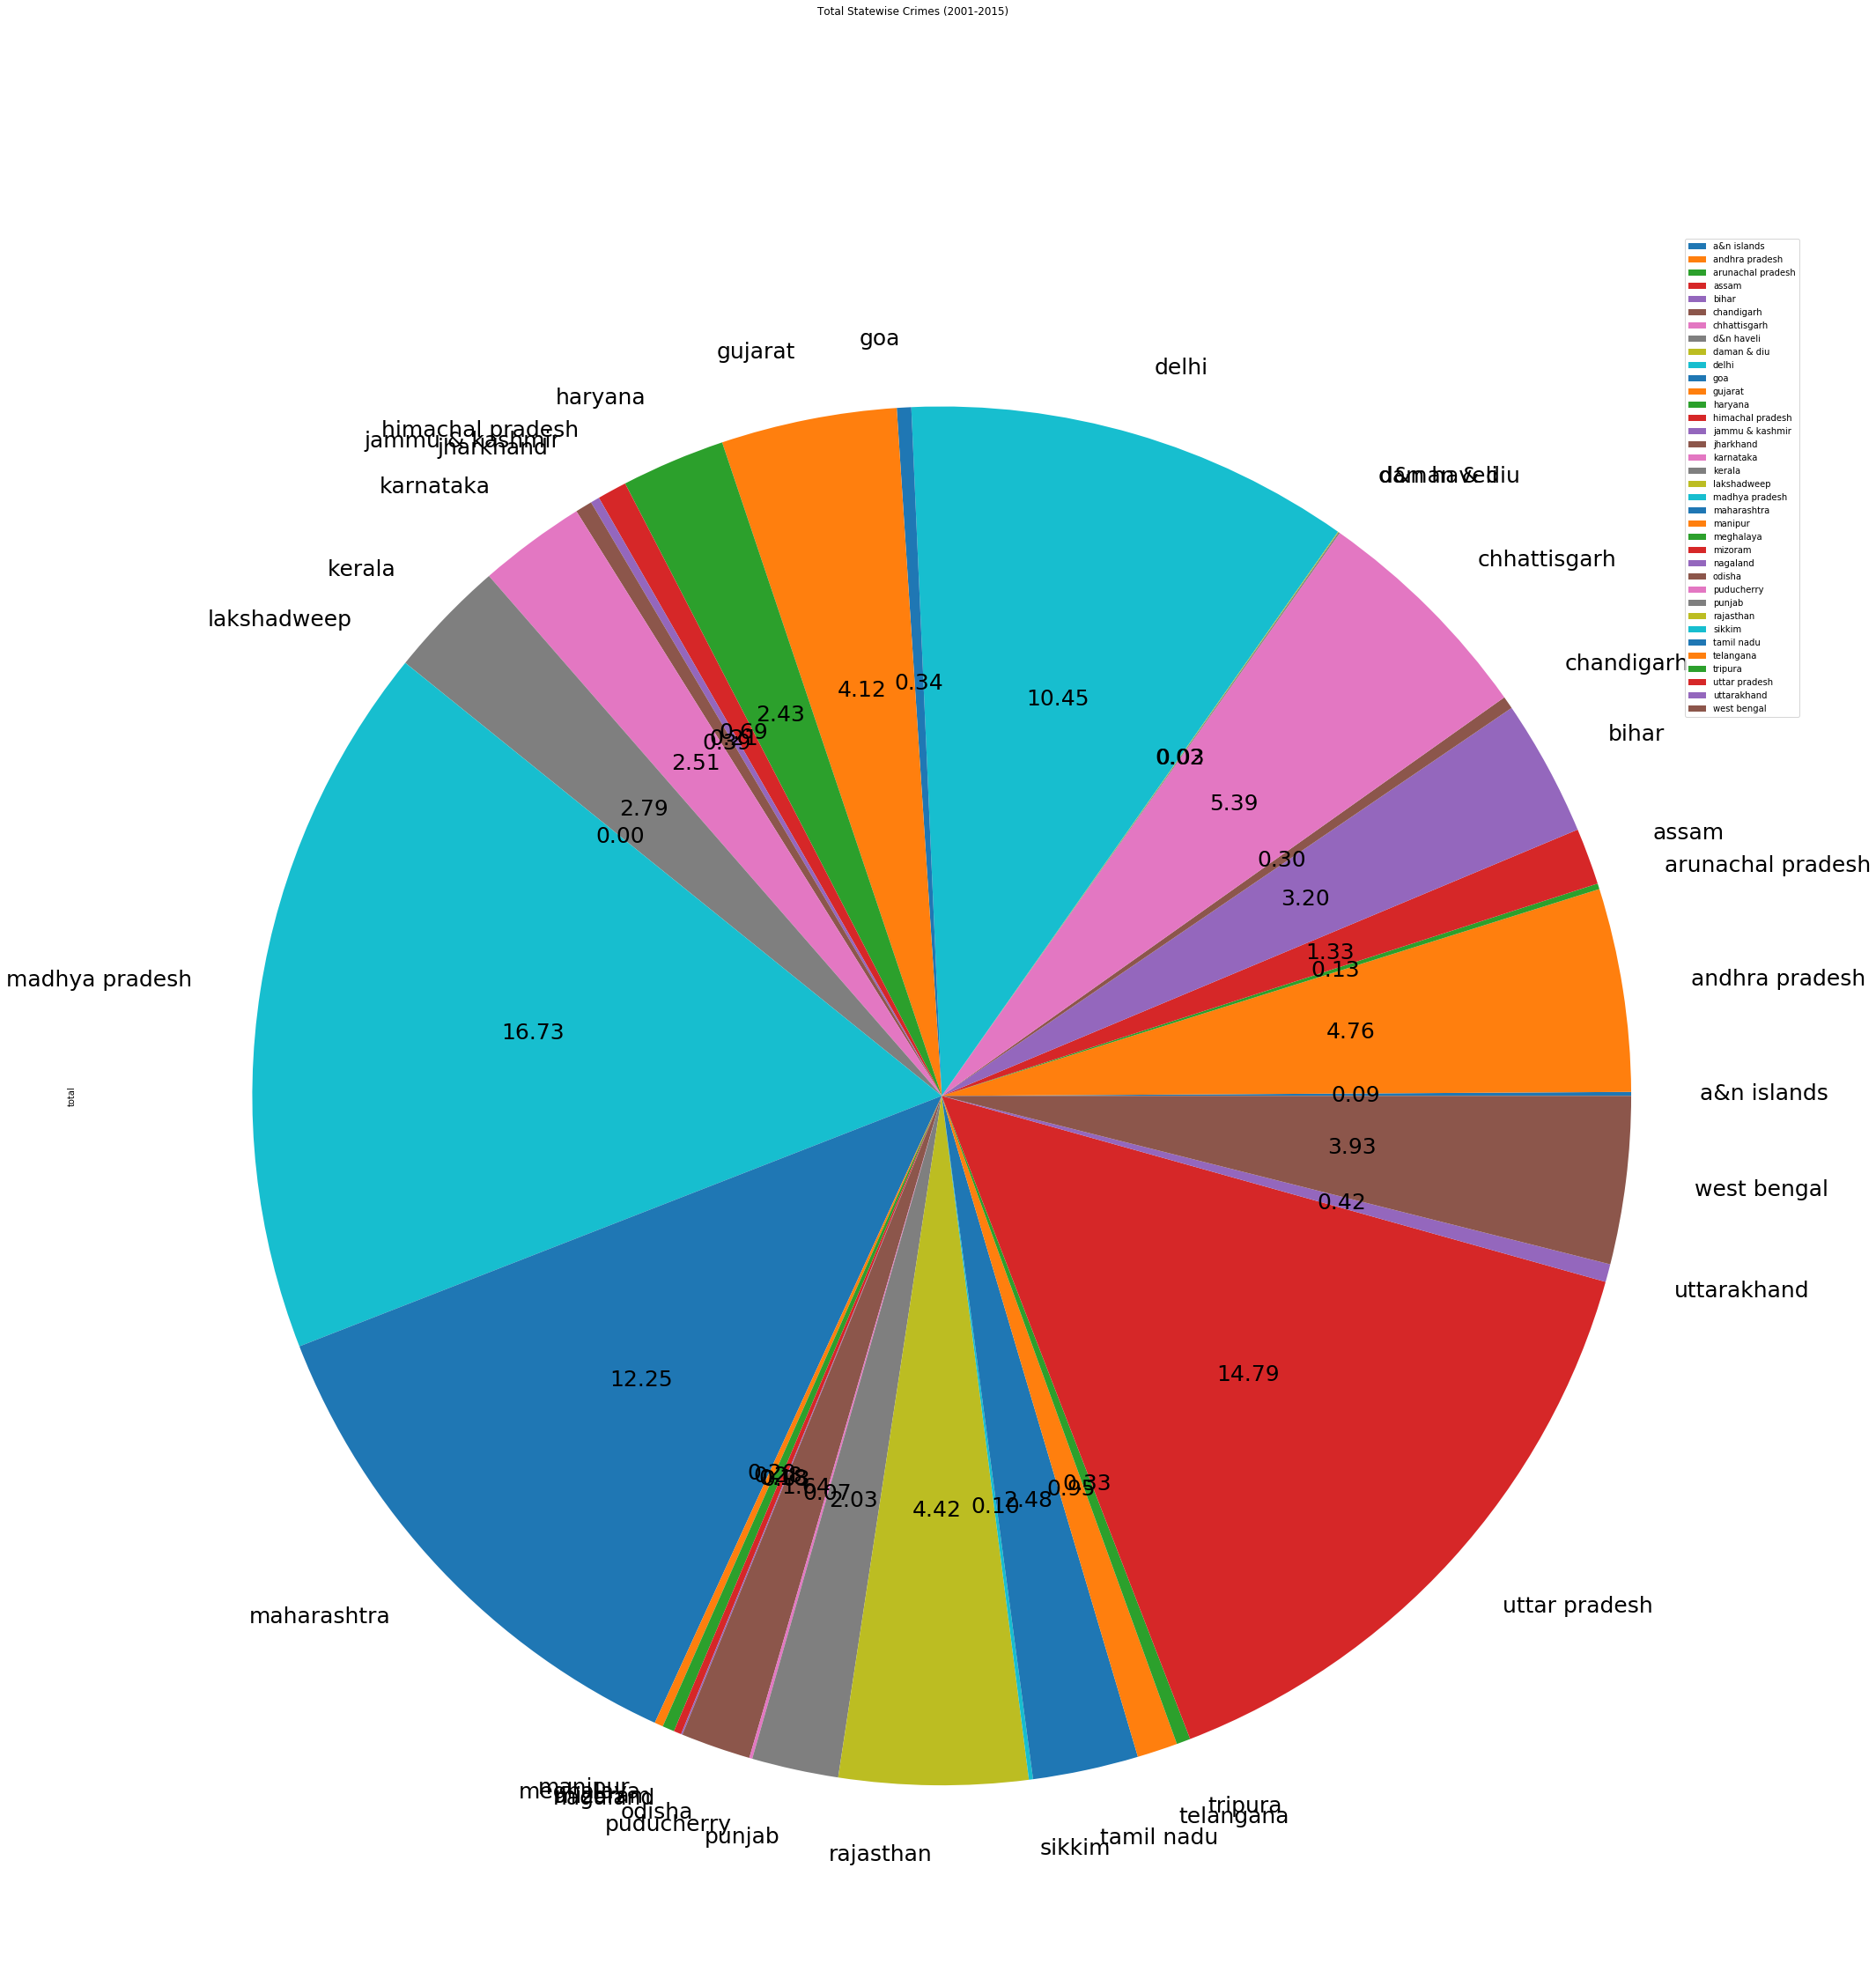

In [15]:
total_crimes_statewise.plot(subplots=True, kind='pie', title='Total Statewise Crimes (2001-2015)', 
                            fontsize=25, figsize=(36,36), autopct='%.2f')

In [16]:
madhya_pradesh_crimes = state_df.loc[state_df['state'] == 'madhya pradesh'].drop(['total', 'other crimes'], axis=1)
madhya_pradesh_crimes

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act
13,madhya pradesh,2001,103.0,390.0,7.0,100.0,8.0,69.0,4.0,0.0,4.0
48,madhya pradesh,2002,94.0,517.0,4.0,154.0,1.0,91.0,5.0,1.0,2.0
83,madhya pradesh,2003,165.0,699.0,11.0,210.0,9.0,90.0,13.0,25.0,3.0
118,madhya pradesh,2004,144.0,710.0,9.0,179.0,5.0,115.0,2.0,0.0,2.0
153,madhya pradesh,2005,150.0,870.0,12.0,240.0,7.0,95.0,4.0,0.0,18.0
188,madhya pradesh,2006,160.0,829.0,14.0,237.0,12.0,105.0,6.0,0.0,4.0
223,madhya pradesh,2007,160.0,1043.0,10.0,283.0,5.0,141.0,16.0,2.0,5.0
258,madhya pradesh,2008,107.0,892.0,8.0,264.0,6.0,99.0,15.0,4.0,2.0
293,madhya pradesh,2009,127.0,1071.0,39.0,427.0,8.0,103.0,1.0,1.0,0.0
328,madhya pradesh,2010,144.0,1182.0,18.0,440.0,7.0,93.0,18.0,2.0,4.0


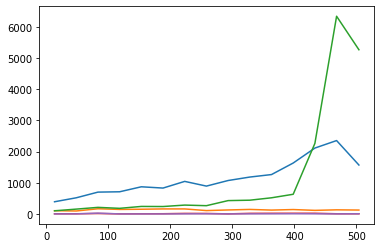

In [17]:
plt.pyplot.plot(madhya_pradesh_crimes.loc[:,('rape','murder', 'kidnapping and abduction',
                                         'procuration of minor girls', 'selling girls for prostitution')])

## Correlation Matrix

In [18]:
df.drop(['total'], axis=1).corr()

,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling of girls for prostitution,prohibition of child marriage act,other crimes
murder,1.000000,0.350288,0.074489,0.268453,0.057314,0.205560,0.043291,0.060468,0.091097,0.218379
rape,0.350288,1.000000,0.164347,0.582195,0.096203,0.274831,0.057528,0.061304,0.090269,0.469625
foeticide,0.074489,0.164347,1.000000,0.084855,0.072905,0.067533,0.000907,0.000630,0.007632,0.141290
kidnapping and abduction,0.268453,0.582195,0.084855,1.000000,0.032181,0.181628,0.079847,0.076449,0.077749,0.233076
abetment of suicide,0.057314,0.096203,0.072905,0.032181,1.000000,0.034572,0.008615,0.009677,0.023827,0.089933
exposure and abandonment,0.205560,0.274831,0.067533,0.181628,0.034572,1.000000,0.008042,-0.001523,0.083159,0.188590
procuration of minor girls,0.043291,0.057528,0.000907,0.079847,0.008615,0.008042,1.000000,0.285690,0.165471,0.013388
selling of girls for prostitution,0.060468,0.061304,0.000630,0.076449,0.009677,-0.001523,0.285690,1.000000,0.116840,0.004589
prohibition of child marriage act,0.091097,0.090269,0.007632,0.077749,0.023827,0.083159,0.165471,0.116840,1.000000,0.055193
other crimes,0.218379,0.469625,0.141290,0.233076,0.089933,0.188590,0.013388,0.004589,0.055193,1.000000


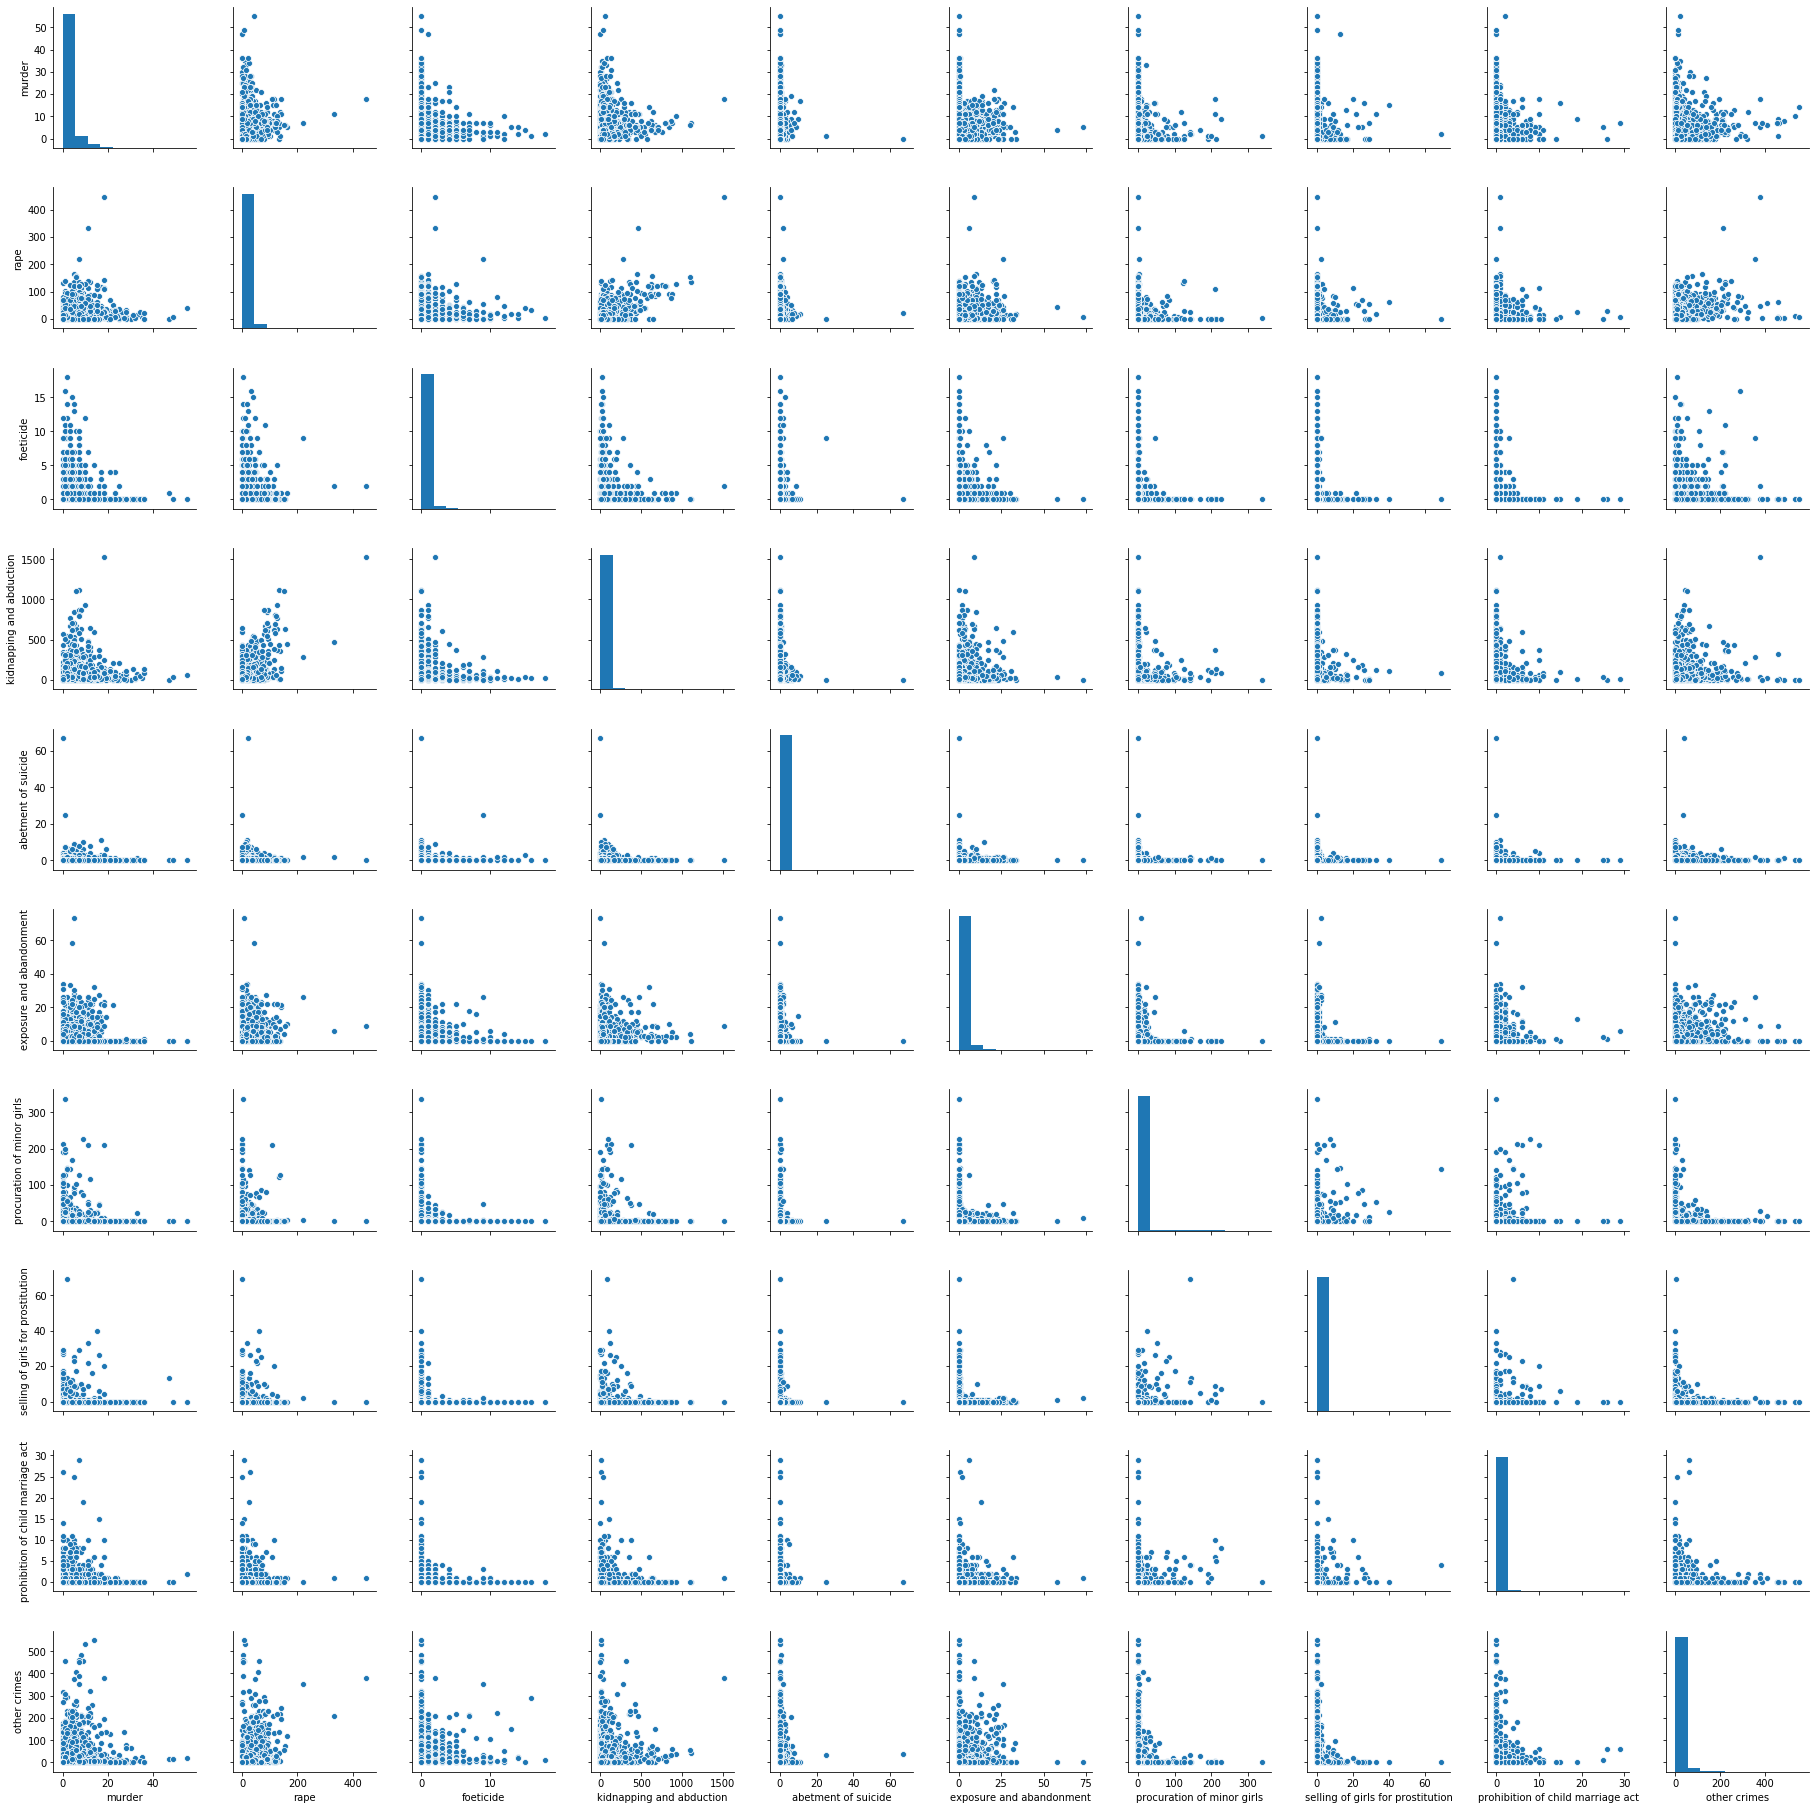

In [19]:
sns.pairplot(df.drop(['year', 'total'], axis=1))